In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
Nclass = 500

In [34]:
x1 = np.random.randn(Nclass, 2) * np.array([0, -2])
x2 = np.random.randn(Nclass, 2) * np.array([2, 2])
x3 = np.random.randn(Nclass, 2) * np.array([-2, 2])

In [35]:
X= np.vstack([x1, x2, x3])

In [36]:
Y = np.array([0]* Nclass + [1]*Nclass + [2]*Nclass)

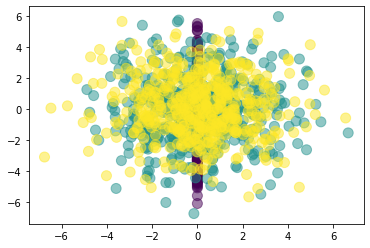

In [37]:
#lets see the plot
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.5)
plt.show()

In [38]:
#randomly initialize weights
D = 2 #dimensionality of inputs
M = 3 #hidden layer size
K = 3 # number of classes

In [39]:
W1 = np.random.randn(D, K)
b1 = np.random.randn(M) #size of M

In [40]:
W1

array([[-1.08521267, -0.91735903, -0.54904166],
       [-0.91769597, -0.37834111, -1.04320665]])

In [41]:
b1

array([-0.31202068, -1.87780368,  0.92380341])

In [42]:
W2 = np.random.randn(M, K)
b2 = np.random.randn(K) #size of K

In [43]:
W2

array([[-0.56114568, -1.40955089,  0.24959484],
       [ 0.48791313,  1.73171763,  0.04565831],
       [ 1.70834141,  0.47514199,  1.55581954]])

In [44]:
b2

array([-2.19512095, -1.03136756, -0.85294944])

In [45]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [46]:
X.dot(W1)

array([[ 0.44137878,  0.18196848,  0.5017449 ],
       [ 0.38102454,  0.15708607,  0.43313619],
       [ 2.45815151,  1.01342907,  2.79434593],
       ...,
       [-0.38903464, -0.0646426 , -0.58171647],
       [ 2.41938885,  0.7858758 ,  3.0584833 ],
       [-5.01241465, -3.06328202, -4.24589225]])

In [61]:
X.dot(W1) + b1

array([[ 0.1293581 , -1.69583521,  1.42554832],
       [ 0.06900387, -1.72071762,  1.3569396 ],
       [ 2.14613083, -0.86437461,  3.71814934],
       ...,
       [-0.70105532, -1.94244629,  0.34208695],
       [ 2.10736818, -1.09192789,  3.98228671],
       [-5.32443532, -4.9410857 , -3.32208884]])

In [62]:
#forward action
def forward(X, W1, b1, W2, b2):
    #sigmoid
    Z = 1/(1+np.exp(X.dot(W1) + b1))
    A = np.dot(Z, W2) + b2
    expA = np.exp(A)
    Y = expA/expA.sum(axis = 1, keepdims = True) #here 'keepdims' is used to convert 2d dimensionality
    return Y

In [63]:
#tanh
Z1 = np.tanh(X.dot(W1) + b1)
#relu
Z2 = np.maximum(X.dot(W1) + b1, 0)

In [64]:
Z1

array([[ 0.12864136, -0.9348864 ,  0.89075068],
       [ 0.06889455, -0.93794938,  0.87568135],
       [ 0.97302098, -0.69850472,  0.99882177],
       ...,
       [-0.6050372 , -0.95972753,  0.32933926],
       [ 0.97087788, -0.79758071,  0.99930512],
       [-0.99995255, -0.99989785, -0.99740023]])

In [65]:
Z2

array([[0.1293581 , 0.        , 1.42554832],
       [0.06900387, 0.        , 1.3569396 ],
       [2.14613083, 0.        , 3.71814934],
       ...,
       [0.        , 0.        , 0.34208695],
       [2.10736818, 0.        , 3.98228671],
       [0.        , 0.        , 0.        ]])

In [66]:
#determine the classification rate
#num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [67]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis = 1)

In [68]:
#verify we choose the correct axis
assert(len(P) == len(Y))
print("classification rate for randomly choosen weights:", classification_rate(Y, P))

classification rate for randomly choosen weights: 0.3466666666666667
